In [4]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from collections import defaultdict

In [2]:
s1 =  np.array([[1, 1, 1],
                [1, -1, 1],
                [1, -1, 1],
                [1, -1, 1],
                [1, 1, 1]])

s2 =  np.array([[1, 1, 1],
                [1, -1, 1],
                [1, 1, 1],
                [1, -1, 1],
                [1, 1, 1]])

inputs = [s1, s2]

for i in range(len(inputs)):
    inputs[i] = inputs[i].reshape(inputs[i].shape[0] * inputs[i].shape[1], -1)

# 1)

Text(0.5, 1.0, 'accuracy of modified hebbian for 8 matrix')

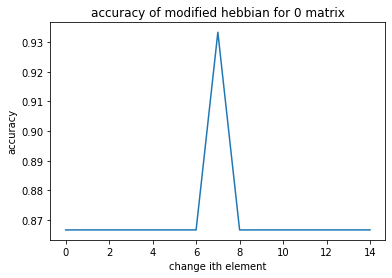

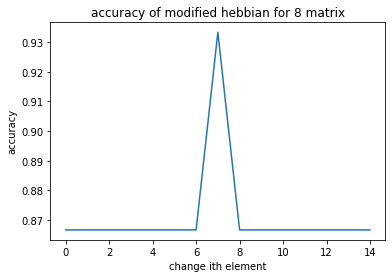

In [3]:
class ModifiedHebbian:
    def __init__(self, noise=0, missing=0):
        self.W = None

    def fit(self, inputs):
        self.W = np.sum([s @ t.T for s, t in zip(inputs, inputs)], axis=0)
        self.W = self.W - len(inputs) * np.identity(self.W.shape[0])
    

    def transform(self, s):
        return np.sign(s.T @ self.W)

    
def accuracy(inputs, outputs):
    return sum([1 if outputs[i] == inputs[i] else 0 for i in range(len(outputs))]) / len(outputs)

hebbian = ModifiedHebbian()
hebbian.fit(inputs)

accuracy_hebbian = []
for s in inputs:
    for i in range(len(s)):
        s[i] = -s[i]
        output = hebbian.transform(s)
        accuracy_hebbian.append(accuracy(s[:, 0], output[0]))
        s[i] = -s[i]
    
plt.plot(accuracy_hebbian[:len(inputs[0])], label='s1')
plt.xlabel('change ith element')
plt.ylabel('accuracy')
plt.title('accuracy of modified hebbian for 0 matrix')

plt.figure()
plt.plot(accuracy_hebbian[len(inputs[0]):], label='s2')
plt.xlabel('change ith element')
plt.ylabel('accuracy')
plt.title('accuracy of modified hebbian for 8 matrix') 

# 2)

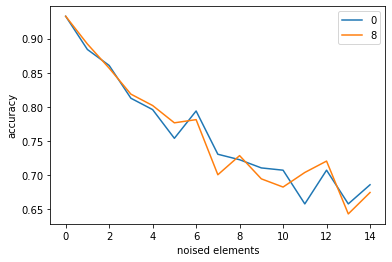

In [25]:
chars = ['0', '8']
accs = defaultdict(list)

n_samples = 100
total = len(inputs[0])
for i, char in enumerate(chars):
    for select in range(total):
        samples = np.random.binomial(total, p=0.5, size=(n_samples, select+1))
        accs_combinations = []

        for sample in samples:
            s = deepcopy(inputs[i])
            for index in sample:
                s[index-1] = -s[index-1]
            
            output = hebbian.transform(s)
            accs_combinations.append(accuracy(s[:, 0], output[0]))     
        accs[char].append(np.mean(accs_combinations))
        
for char in chars:
    plt.plot(accs[char], label=char)
    plt.xlabel('noised elements')
    plt.ylabel('accuracy')
plt.legend()


# 3)

Text(0.5, 1.0, 'accuracy of modified hebbian for 8 matrix')

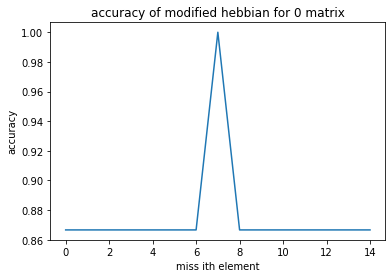

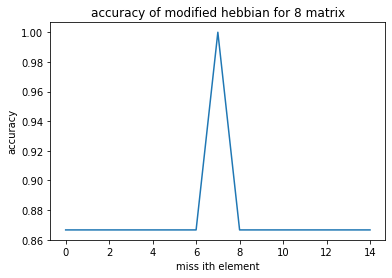

In [16]:
accuracy_hebbian = []
for s in inputs:
    for i in range(len(s)):
        temp = deepcopy(s[i])
        s[i] = 0
        output = hebbian.transform(s)
        accuracy_hebbian.append(accuracy(s[:, 0], output[0]))
        s[i] = temp
plt.plot(accuracy_hebbian[:len(inputs[0])], label='s1')
plt.xlabel('miss ith element')
plt.ylabel('accuracy')
plt.title('accuracy of modified hebbian for 0 matrix')

plt.figure()
plt.plot(accuracy_hebbian[len(inputs[0]):], label='s2')
plt.xlabel('miss ith element')
plt.ylabel('accuracy')
plt.title('accuracy of modified hebbian for 8 matrix') 

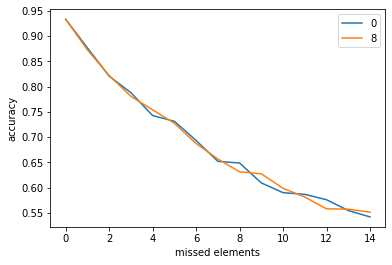

In [26]:
chars = ['0', '8']
accs = defaultdict(list)

n_samples = 100
total = len(inputs[0])
for i, char in enumerate(chars):
    for select in range(total):
        samples = np.random.binomial(total, p=0.5, size=(n_samples, select+1))
        accs_combinations = []

        for sample in samples:
            s = deepcopy(inputs[i])
            for index in sample:
                s[index-1] = 0
            
            output = hebbian.transform(s)
            accs_combinations.append(accuracy(s[:, 0], output[0]))     
        accs[char].append(np.mean(accs_combinations))
        
for char in chars:
    plt.plot(accs[char], label=char)
    plt.xlabel('missed elements')
    plt.ylabel('accuracy')
plt.legend()

# 4)

In [28]:
s1 =  np.array([[1, 1, 1],
                [1, -1, 1],
                [1, -1, 1],
                [1, -1, 1],
                [1, 1, 1]])

s2 =  np.array([[-1, 1, -1],
                [-1, 1, -1],
                [-1, 1, -1],
                [-1, 1, -1],
                [-1, 1, -1]])

inputs = [s1, s2]

for i in range(len(inputs)):
    inputs[i] = inputs[i].reshape(inputs[i].shape[0] * inputs[i].shape[1], -1)

Text(0.5, 1.0, 'accuracy of modified hebbian for 1 matrix')

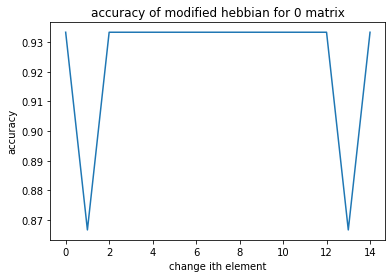

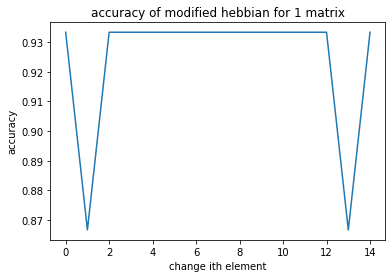

In [29]:
hebbian = ModifiedHebbian()
hebbian.fit(inputs)

accuracy_hebbian = []
for s in inputs:
    for i in range(len(s)):
        s[i] = -s[i]
        output = hebbian.transform(s)
        accuracy_hebbian.append(accuracy(s[:, 0], output[0]))
        s[i] = -s[i]

plt.plot(accuracy_hebbian[:len(inputs[0])], label='s1')
plt.xlabel('change ith element')
plt.ylabel('accuracy')
plt.title('accuracy of modified hebbian for 0 matrix')

plt.figure()
plt.plot(accuracy_hebbian[len(inputs[0]):], label='s2')
plt.xlabel('change ith element')
plt.ylabel('accuracy')
plt.title('accuracy of modified hebbian for 1 matrix') 

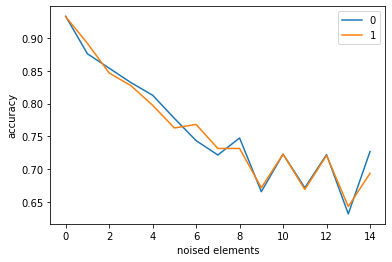

In [30]:
chars = ['0', '1']
accs = defaultdict(list)

n_samples = 100
total = len(inputs[0])
for i, char in enumerate(chars):
    for select in range(total):
        samples = np.random.binomial(total, p=0.5, size=(n_samples, select+1))
        accs_combinations = []

        for sample in samples:
            s = deepcopy(inputs[i])
            for index in sample:
                s[index-1] = -s[index-1]
            
            output = hebbian.transform(s)
            accs_combinations.append(accuracy(s[:, 0], output[0]))     
        accs[char].append(np.mean(accs_combinations))
        
for char in chars:
    plt.plot(accs[char], label=char)
    plt.xlabel('noised elements')
    plt.ylabel('accuracy')
plt.legend()
